## TDMS Converter ##

In [ ]:
# http://www.wikihow.com/Install-FFmpeg-on-Windows

In [1]:
import numpy as np
import matplotlib
matplotlib.use("agg")
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.animation as animation

import fnmatch
import os

from IPython.display import clear_output

from nptdms import TdmsFile # this library contains the actual TDMS loading parts
#from ipywidgets import interact

In [2]:
wdir = '.' # set the open file dialog directory to the notebook directory
def openFileDialog(wdir):
    from PyQt5.QtWidgets import QApplication,QFileDialog
    app = QApplication([dir])
    files = QFileDialog.getOpenFileNames(None, "Select Files...", wdir, filter="All Files (*)")
    return files[0]

def loadTDMS(file):
    global exposure, dimx, dimy
    tdms_file = TdmsFile(file)
    p=tdms_file.object().properties   
    dimx=int(p['dimx'])  
    dimy=int(p['dimy'])
    frames=int(p['dimz'])
    exposure=float(p['exposure'])
    images=tdms_file.channel_data('Image','Image')
    return images.reshape(frames,dimx,dimy)

In [3]:
files = openFileDialog(wdir)
images = np.zeros(0)
for file in files:
    if fnmatch.fnmatch(file,'*_movie.tdms'):
        if images.size == 0:
            images = loadTDMS(file)
        else:
            images = np.concatenate((images,loadTDMS(file)), axis=0)
        print(file)
wdir=os.path.dirname(files[0])  # set the open file dialog directory to the working directory
print(images.shape)

//192.168.131.72/mona/Data/Nic/Messdaten/120917_JP_Box_PS_1mu/WF_001_movie.tdms
(9, 512, 512)


Progress: 98 %


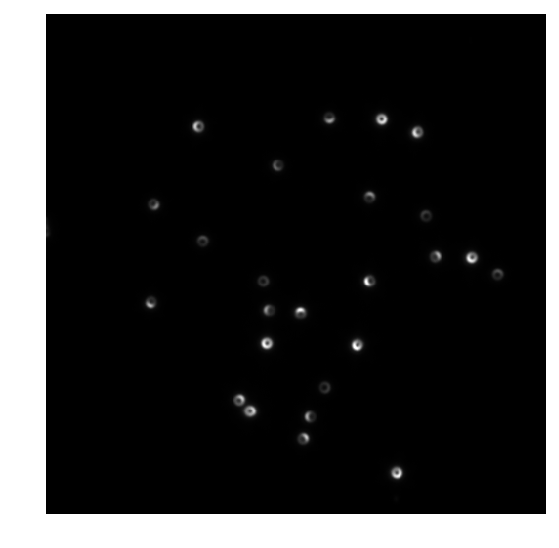

In [4]:
ffmpegWriter = animation.writers['ffmpeg']
#writer = ffmpegWriter(fps=1./exposure,codec="msvideo1") # + ".avi" for PowerPoint 2010
writer = ffmpegWriter(fps=1./exposure) # + ".mp4"

fig = plt.figure(figsize=(5, 5), dpi=100)
fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)
im = plt.imshow(images[0], cmap='gray') # vmax=...   ,vmin = 100,vmax = 200
plt.axis('off')

with writer.saving(fig, files[0] + ".mp4", dpi=100):
    for i in range(images.shape[0]):
        im.set_data(images[i])
        writer.grab_frame()
        if (i % 10 == 0):
            clear_output(wait=True)
            print('Progress:', int(i/images.shape[0]*100), '%')

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)
plt.imshow(images[5000],cmap='gray');

In [ ]:
def f(i):
    plt.imshow(images[i],cmap='gray')

In [ ]:
plt.imshow(images[0],cmap=plt.get_cmap('terrain_r'));

In [ ]:
interact(showImages,i=(0,100,1));

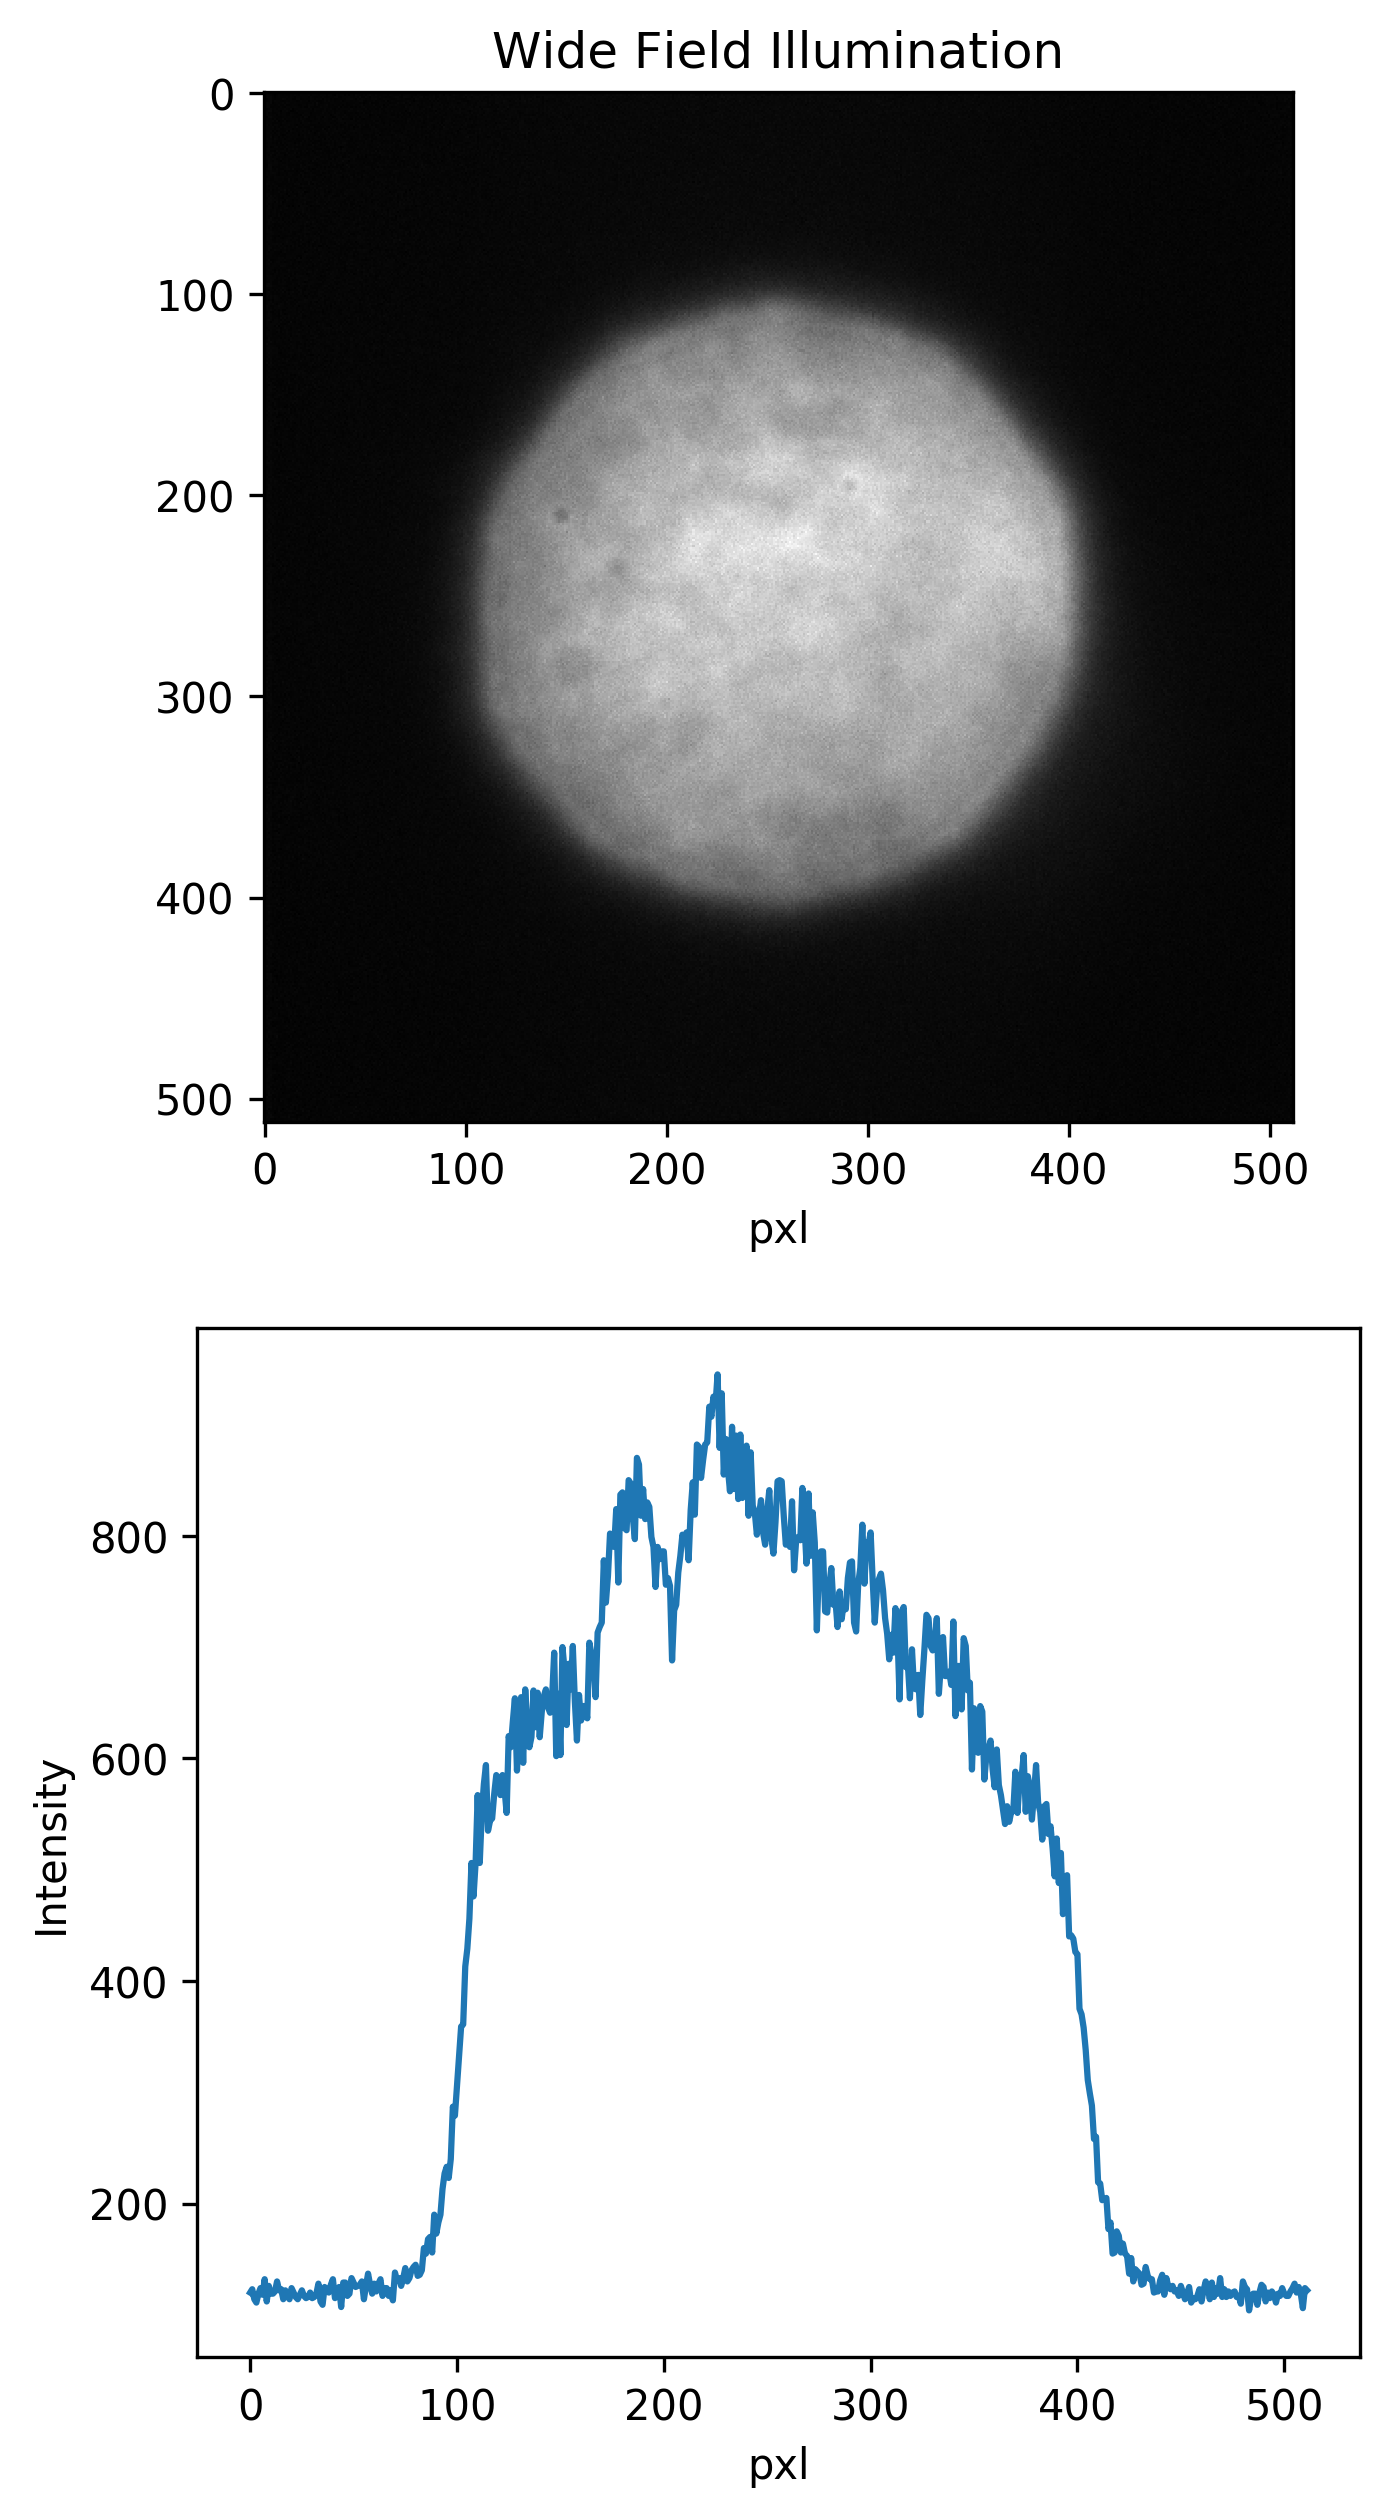

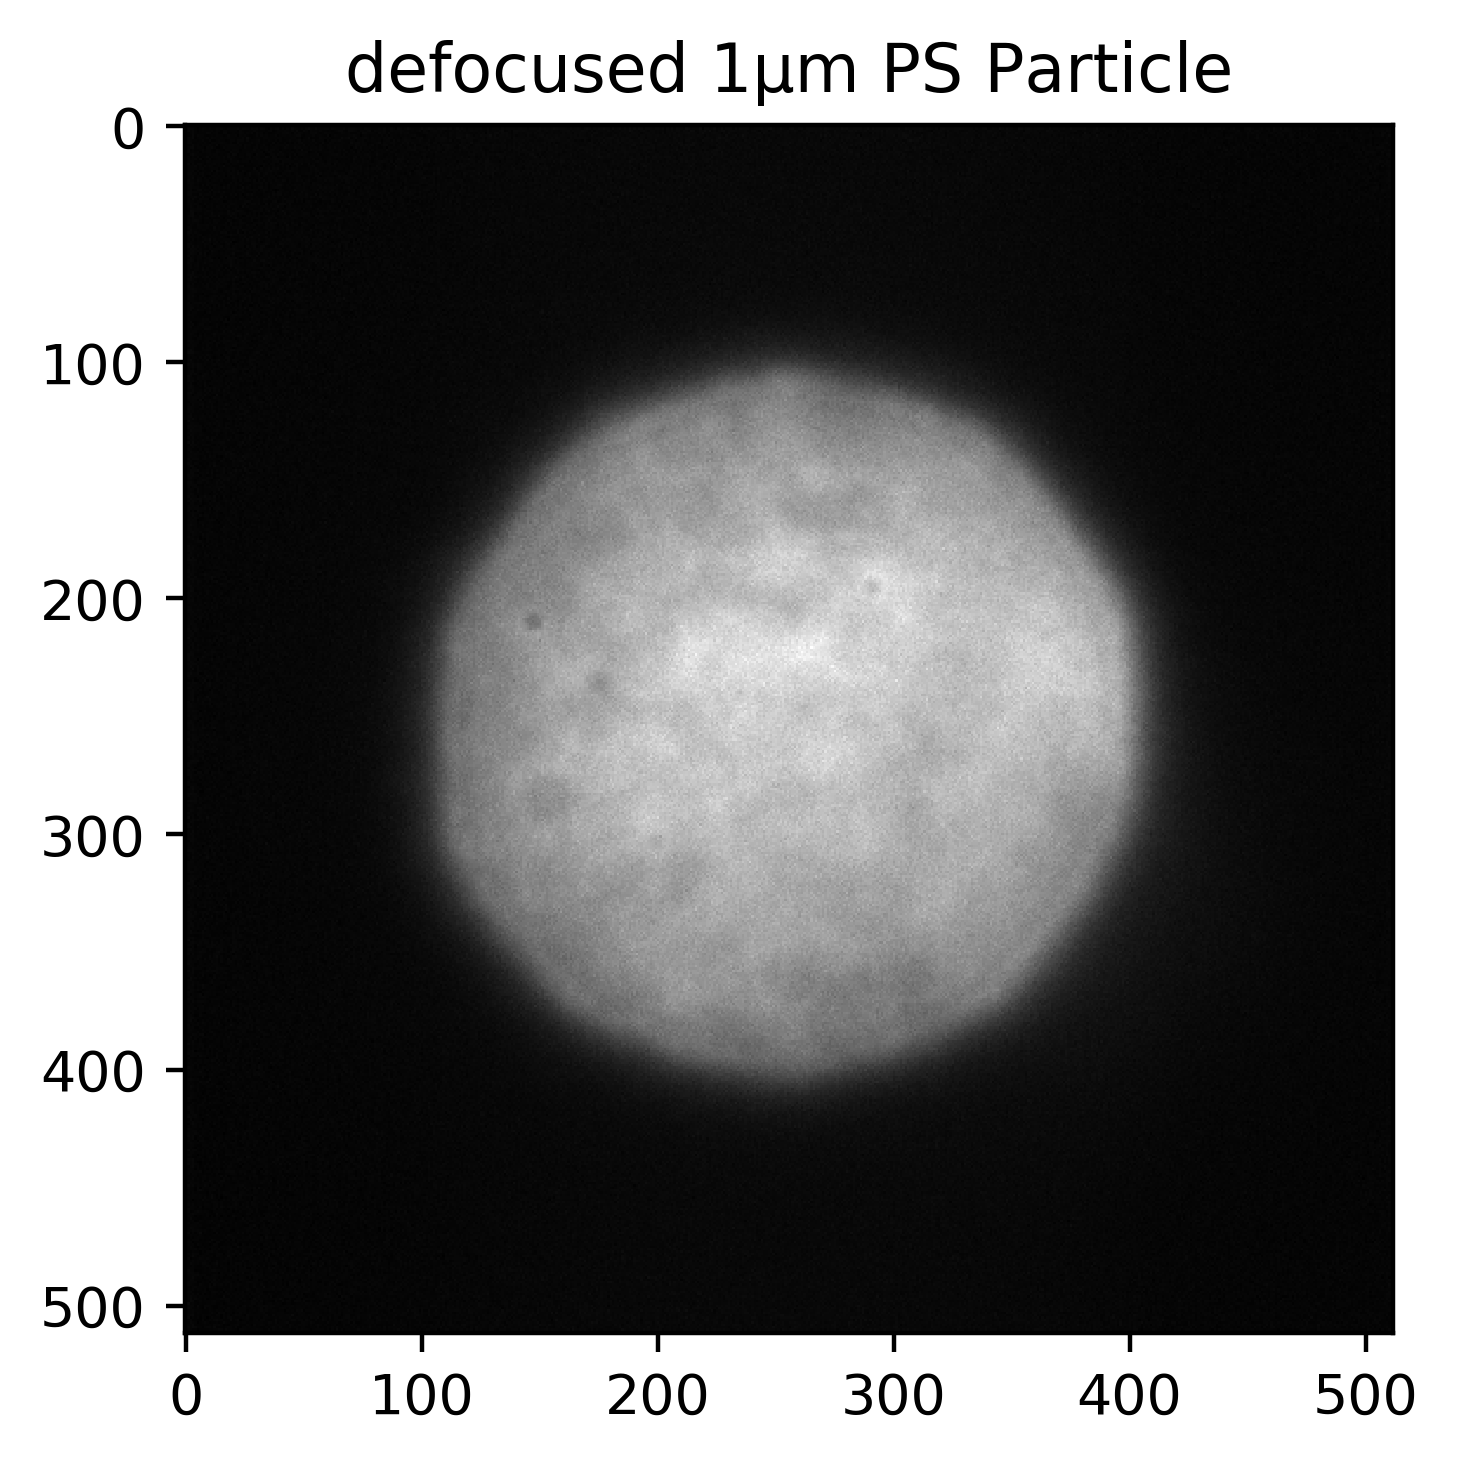

In [23]:
## save  a particlular image

fig, (ax0, ax1) = plt.subplots(nrows=2, figsize=(5, 10),dpi = 300)
ax0.set_title('Wide Field Illumination')
ax0.imshow(images[0],"gray")
ax0.set_xlabel('pxl')
ax1.plot(range(256*2),images[0][:,256])
ax1.set_ylabel('Intensity')
ax1.set_xlabel('pxl')
fig.savefig('WF')


plt.figure(dpi=400)
plt.imshow(images[0],"gray")
plt.title('defocused 1µm PS Particle')
plt.savefig('C:/Users/Nic/Desktop/temp/WF_illumination')
#plt.figure()
#plt.imshow(images[150],"gray")
#plt.title('focused 1µm PS Particle')
#plt.savefig('C:/Users/Nic/Desktop/temp/6ersymmertie_focused')

#plt.figur
#plt.plot(range(256*2),images[0][:,255])





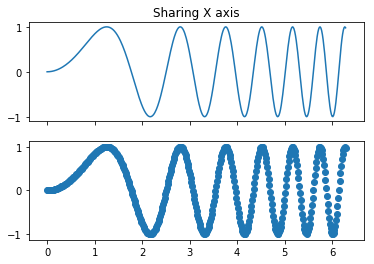

In [11]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

# Two subplots, the axes array is 1-d
f, ax = plt.subplots(2, sharex=True)
ax[0].plot(x, y)
ax[0].set_title('Sharing X axis')
ax[1].scatter(x, y)

